# Q4 (ab)

In [14]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import sys

In [16]:
q=np.loadtxt(r"van_vleck.txt",dtype=np.int8)

w=np.zeros((73,160))
for i in range(73):
    x=0.1*i
    for j in range(160):
        y=0.1*j
        w[i,j]=sin(x+0.5*y)


In [17]:
def fscale(v,vmin,vsca):
    vs=(v-vmin)*vsca
    if vs<0: vs=0
    if vs>1: vs=1
    return vs

In [18]:
def palette1(v):
    if v<0: v=0
    if v>1: v=1
    return (1,1-v*3,1-4*v(1-v))

def plot1(fn,p,wa,vmin,vmax,ups):

    (m,n)=p.shape
    if (m,n)!=wa.shape:
        print("Matrix dimension mismatch")

    # Set up output array and scaling constant
    o=np.zeros((m*ups,n*ups,3))
    vsca=1.0/(vmax-vmin)

    # Assemble the output array
    for i in range(m):
        iu=i*ups
        for j in range(n):
            ju=j*ups
            if wa[i,j]==1:
                o[iu:iu+ups,ju:ju+ups,0]=0
                o[iu:iu+ups,ju:ju+ups,1]=0
                o[iu:iu+ups,ju:ju+ups,2]=0
            else:
                (re,gr,bl)=palette1(fscale(p[i,j],vmin,vsca))
                o[iu:iu+ups,ju:ju+ups,0]=re
                o[iu:iu+ups,ju:ju+ups,1]=gr
                o[iu:iu+ups,ju:ju+ups,2]=bl
    plt.imsave(fn,o)

In [19]:
# Returns a black->red->yellow color scheme (matching Gnuplot's PM3D scheme)
def palette2(v):
    if v>0.5:
        vs=0
    else:
        vs=sin(2*pi*v)
    return (sqrt(v),v*v*v,vs)

def plot2(fn,p,wa,vmin,vmax,ups):
    
    (m,n)=p.shape
    if (m,n)!=wa.shape:
        print("Matrix dimension mismatch")

    # Set up output array and scaling constant
    o=np.zeros((m*ups,n*ups,3))
    vsca=1.0/(vmax-vmin)

    # Assemble the output array
    for i in range(m):
        iu=i*ups
        for j in range(n):
            ju=j*ups
            if wa[i,j]==1:
                o[iu:iu+ups,ju:ju+ups,0]=1
                o[iu:iu+ups,ju:ju+ups,1]=1
                o[iu:iu+ups,ju:ju+ups,2]=1
            else:
                (re,gr,bl)=palette2(fscale(p[i,j],vmin,vsca))
                o[iu:iu+ups,ju:ju+ups,0]=re
                o[iu:iu+ups,ju:ju+ups,1]=gr
                o[iu:iu+ups,ju:ju+ups,2]=bl
    plt.imsave(fn,o)
    plt.imshow(o) 
    plt.colorbar()
    plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt


h = 0.225 

building = np.loadtxt(r"van_vleck.txt",dtype=np.int8)
conc = np.zeros((building.shape[0], building.shape[1]))

conc[36:40, 44:48] = 1  
b = 0.55
k = h**2 / (6*b)  

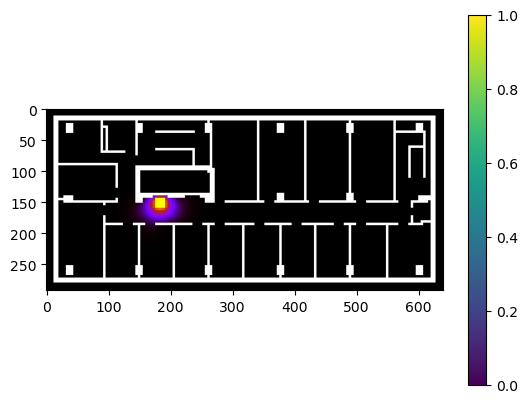

In [24]:
# T = 1s
nt = int(1/k)

u = np.zeros((nt, conc.shape[0], conc.shape[1]))   
u[0] = conc
P_indices = []
for i in range(36,40):
    for j in range(44,48):
        P_indices.append((i,j))

for n in range(nt-1):
    un = u[n]  
    unp1 = np.zeros_like(un)

   # Interior points
    unp1[1:-1, 1:-1] = un[1:-1, 1:-1] + b*k/h**2 * (un[2:, 1:-1] + un[0:-2, 1:-1]  
                                               + un[1:-1, 2:] + un[1:-1, 0:-2]
                                               - 4*un[1:-1, 1:-1]) 

   # Boundary conditions
   # Left and right edges
    unp1[1:-1, 0] = un[1:-1, 0] 
    unp1[1:-1, -1] = un[1:-1, -1]

   # Top and bottom edges 
    unp1[0, 1:-1] = un[0, 1:-1]
    unp1[-1, 1:-1] = un[-1, 1:-1]

   # Interior walls 
    for i in range(1,unp1.shape[0]-1):
        for j in range(1, unp1.shape[1]-1):
            if building[i,j] == 1:
                unp1[i,j] = un[i,j] #ghost node approach
            
    for i,j in P_indices:
        unp1[i,j] = 1.0

    u[n+1] = unp1
#plt.imshow(u[nt-1]**0.25) 
#plt.colorbar()
#plt.show()
plot2(r"van.png",u[nt-1]**0.25,building,0,1,4)

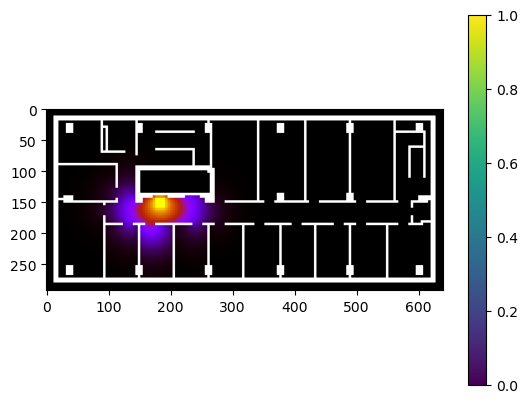

In [26]:
nt = int(5/k)

# Solution array
u = np.zeros((nt, conc.shape[0], conc.shape[1]))   
u[0] = conc

# Indices for source region P
P_indices = []
for i in range(36,40):
    for j in range(44,48):
        P_indices.append((i,j))

for n in range(nt-1):


    un = u[n]  
    unp1 = np.zeros_like(un)

   # Interior points
    unp1[1:-1, 1:-1] = un[1:-1, 1:-1] + b*k/h**2 * (un[2:, 1:-1] + un[0:-2, 1:-1]  
                                               + un[1:-1, 2:] + un[1:-1, 0:-2]
                                               - 4*un[1:-1, 1:-1]) 

   # Boundary conditions
   # Left and right edges
    unp1[1:-1, 0] = un[1:-1, 0] 
    unp1[1:-1, -1] = un[1:-1, -1]

   # Top and bottom edges 
    unp1[0, 1:-1] = un[0, 1:-1]
    unp1[-1, 1:-1] = un[-1, 1:-1]

   # Interior walls 
    for i in range(1,unp1.shape[0]-1):
        for j in range(1, unp1.shape[1]-1):
            if building[i,j] == 1:
                unp1[i,j] = un[i,j] #ghost node approach
            
    for i,j in P_indices:
        unp1[i,j] = 1.0

    u[n+1] = unp1
plot2(r"van.png",u[nt-1]**0.25,building,0,1,4)

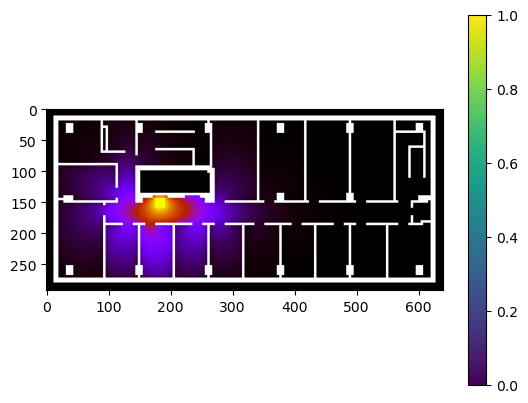

In [8]:
nt = int(25/k)

# Solution array
u = np.zeros((nt, conc.shape[0], conc.shape[1]))   
u[0] = conc

# Indices for source region P
P_indices = []
for i in range(36,40):
    for j in range(44,48):
        P_indices.append((i,j))

for n in range(nt-1):


    un = u[n]  
    unp1 = np.zeros_like(un)

   # Interior points
    unp1[1:-1, 1:-1] = un[1:-1, 1:-1] + b*k/h**2 * (un[2:, 1:-1] + un[0:-2, 1:-1]  
                                               + un[1:-1, 2:] + un[1:-1, 0:-2]
                                               - 4*un[1:-1, 1:-1]) 

   # Boundary conditions
   # Left and right edges
    unp1[1:-1, 0] = un[1:-1, 0] 
    unp1[1:-1, -1] = un[1:-1, -1]

   # Top and bottom edges 
    unp1[0, 1:-1] = un[0, 1:-1]
    unp1[-1, 1:-1] = un[-1, 1:-1]

   # Interior walls 
    for i in range(1,unp1.shape[0]-1):
        for j in range(1, unp1.shape[1]-1):
            if building[i,j] == 1:
                unp1[i,j] = un[i,j] #ghost node approach
            
    for i,j in P_indices:
        unp1[i,j] = 1.0

    u[n+1] = unp1
plot2(r"van.png",u[nt-1]**0.25,building,0,1,4)

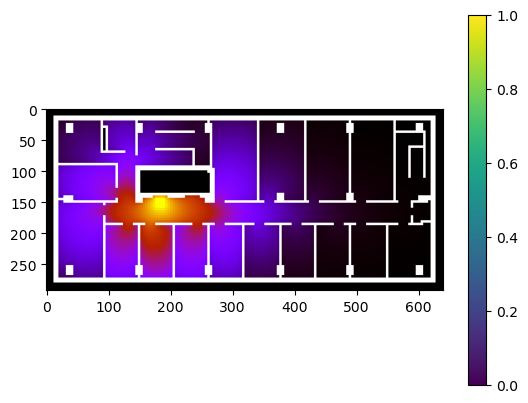

In [13]:
nt = int(100/k)

# Solution array
u = np.zeros((nt, conc.shape[0], conc.shape[1]))   
u[0] = conc

# Indices for source region P
P_indices = []
for i in range(36,40):
    for j in range(44,48):
        P_indices.append((i,j))

for n in range(nt-1):


    un = u[n]  
    unp1 = np.zeros_like(un)

   # Interior points
    unp1[1:-1, 1:-1] = un[1:-1, 1:-1] + b*k/h**2 * (un[2:, 1:-1] + un[0:-2, 1:-1]  
                                               + un[1:-1, 2:] + un[1:-1, 0:-2]
                                               - 4*un[1:-1, 1:-1]) 

   # Boundary conditions
   # Left and right edges
    unp1[1:-1, 0] = un[1:-1, 0] 
    unp1[1:-1, -1] = un[1:-1, -1]

   # Top and bottom edges 
    unp1[0, 1:-1] = un[0, 1:-1]
    unp1[-1, 1:-1] = un[-1, 1:-1]

   # Interior walls 
    for i in range(1,unp1.shape[0]-1):
        for j in range(1, unp1.shape[1]-1):
            if building[i,j] == 1:
                unp1[i,j] = un[i,j] #ghost node approach
            
    for i,j in P_indices:
        unp1[i,j] = 1.0

    u[n+1] = unp1
#plt.imshow(u[nt-1]**0.25) 
#plt.colorbar()
#plt.show()
plot2(r"van.png",u[nt-1]**0.25,building,0,1,4)

# Q4 (c)

In [30]:
# All parameters are already initialized
nt = int(100/k)

u = np.zeros((nt, conc.shape[0], conc.shape[1]))   
u[0] = conc
P_indices = []
for i in range(36,40):
    for j in range(44,48):
        P_indices.append((i,j))

# Professor locations
T = (31, 14)  
Q = (58, 103)
C = (58, 147)

# Threshold for distraction
threshold = 10**-10
T_time = None
Q_time = None
C_time = None
T_conc = []
Q_conc = []
C_conc = []

for n in range(nt-1):

    un = u[n]  
    unp1 = np.zeros_like(un)
    unp1[1:-1, 1:-1] = un[1:-1, 1:-1] + b*k/h**2 * (un[2:, 1:-1] + un[0:-2, 1:-1]  
                                               + un[1:-1, 2:] + un[1:-1, 0:-2]
                                               - 4*un[1:-1, 1:-1]) 
    # Boundaries
    unp1[1:-1, 0] = un[1:-1, 0] 
    unp1[1:-1, -1] = un[1:-1, -1]
    unp1[0, 1:-1] = un[0, 1:-1]
    unp1[-1, 1:-1] = un[-1, 1:-1]

   # Interior walls 
    for i in range(1,unp1.shape[0]-1):
        for j in range(1, unp1.shape[1]-1):
            if building[i,j] == 1:
                unp1[i,j] = un[i,j] #ghost node approach
            
    for i,j in P_indices:
         unp1[i,j] = 1.0

    u[n+1] = unp1
     # Check professor locations
    if u[n, T[0], T[1]] > threshold and T_time is None:
        T_time = n*k
        T_conc.append(u[n, T[0], T[1]]) 

    if u[n, Q[0], Q[1]] > threshold and Q_time is None:  
        Q_time = n*k
        Q_conc.append(u[n, Q[0], Q[1]])

    if u[n, C[0], C[1]] > threshold and C_time is None:
        C_time = n*k 
        C_conc.append(u[n, C[0], C[1]])

print('T_time: ',T_time)
print('Q_time: ',Q_time)
print('C_time: ',C_time)


T_time: 4.2
Q_time: 19.5
C_time: 73.5


ValueError: x and y must have same first dimension, but have shapes (6518,) and (1,)

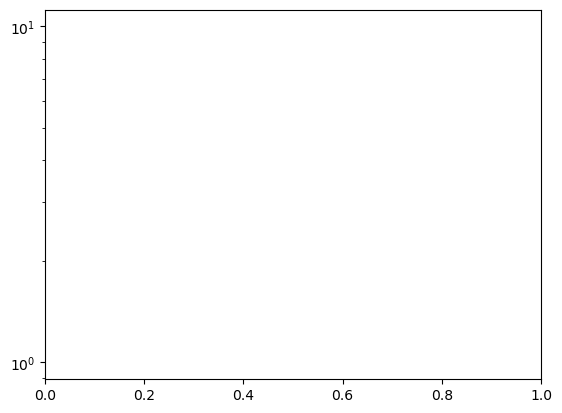

In [29]:
# Print results
#print("T: {:.1f} s".format(T_time))
#print("Q: {:.1f} s".format(Q_time)) 
#print("C: {:.1f} s".format(C_time))
# Plot  
plt.semilogy(range(nt), T_conc, label='T')
plt.semilogy(range(nt), Q_conc, label='Q')
plt.semilogy(range(nt), C_conc, label='C')
plt.legend()
plt.xlabel('Time step')
plt.ylabel('Concentration')
plt.title('Odor concentration')
plt.show()